In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Getting Started

The next steps are steps necessary to loading the data into a pandas dataframe and accessing the it.

In [3]:
totalData = pd.read_csv('SpotifyFeatures.csv')

#to get the data into a pandas dataframe
#totalData is the complete dataframe unfiltered

In [4]:
totalData.head()

#display the head of the dataframe

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Opera,Giuseppe Verdi,"Stiffelio, Act III: Ei fugge! … Lina, pensai c...",7EsKYeHtTc4H4xWiTqSVZA,21,0.986,0.313,490867,0.23100,0.000431,C#,0.0964,-14.287,Major,0.0547,86.001,4/4,0.0886
1,Opera,Giacomo Puccini,Madama Butterfly / Act 1: ... E soffitto e pareti,7MfmRBvqaW0I6UTxXnad8p,18,0.972,0.360,176797,0.20100,0.028000,D#,0.1330,-19.794,Major,0.0581,131.798,4/4,0.3690
2,Opera,Giacomo Puccini,"Turandot / Act 2: Gloria, gloria, o vincitore",7pBo1GDhIysyUMFXiDVoON,10,0.935,0.168,266184,0.47000,0.020400,C,0.3630,-8.415,Major,0.0383,75.126,3/4,0.0696
3,Opera,Giuseppe Verdi,"Rigoletto, Act IV: Venti scudi hai tu detto?",02mvYZX5aKNzdqEo6jF20m,17,0.961,0.250,288573,0.00605,0.000000,D,0.1200,-33.440,Major,0.0480,76.493,4/4,0.0380
4,Opera,Giuseppe Verdi,"Don Carlo / Act 4: ""Ella giammai m'amò!""",03TW0jwGMGhUabAjOpB1T9,19,0.985,0.142,629760,0.05800,0.146000,D,0.0969,-23.625,Major,0.0493,172.935,4/4,0.0382


In [5]:
def main():
    print("Number of observations :: ", len(totalData.index))
    print("Number of columns :: ", len(totalData.columns))
    print("Headers :: ", totalData.columns.values)

    
if __name__ == "__main__":
    main()
    
#defines a function main that gives the details of the dataset

Number of observations ::  228159
Number of columns ::  18
Headers ::  ['genre' 'artist_name' 'track_name' 'track_id' 'popularity' 'acousticness'
 'danceability' 'duration_ms' 'energy' 'instrumentalness' 'key' 'liveness'
 'loudness' 'mode' 'speechiness' 'tempo' 'time_signature' 'valence']


In [6]:
totalData['genre'].unique()

#the genres of the dataset

array(['Opera', 'A Capella', 'Alternative', 'Blues', 'Dance', 'Pop',
       'Electronic', 'R&B', 'Children’s Music', 'Folk', 'Anime', 'Rap',
       'Classical', 'Reggae', 'Hip-Hop', 'Comedy', 'Country', 'Reggaeton',
       'Ska', 'Indie', 'Rock', 'Soul', 'Soundtrack', 'Jazz', 'World',
       'Movie'], dtype=object)

In [7]:
len(totalData['genre'].unique())

#the number of different genres in the dataset

26

In [8]:
dataGenres = ['Opera', 'A Capella', 'Alternative', 'Blues', 'Dance', 'Pop',
       'Electronic', 'R&B', 'Children’s Music', 'Folk', 'Anime', 'Rap',
       'Classical', 'Reggae', 'Hip-Hop', 'Comedy', 'Country', 'Reggaeton',
       'Ska', 'Indie', 'Rock', 'Soul', 'Soundtrack', 'Jazz', 'World',
       'Movie']
dataHeaders = ['genre', 'artist_name', 'track_name', 'track_id', 'popularity', 'acousticness',
 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']

#asigning the data headers and genres to a list

In [9]:
len(dataGenres)

#ensure the data matches

26

# Assesment of Popularity by Genre 
### The Rock Genre

The next section aims to look at particular genres in order to get a better insight on exactly what factors correlate to popularity most. Since the genres have so many different sounds, it seemed logical that comparing songs within the same genre might yield more clear and interpretable results in terms of the factors effects on popularity.

In [10]:
dataDf = pd.DataFrame(totalData)

#looking at the main data

In [11]:
dataDf['genre'] = pd.Categorical(dataDf.genre)
dataDf['key'] = pd.Categorical(dataDf.key)
dataDf['time_signature'] = pd.Categorical(dataDf.time_signature)
dataDf['mode'] = dataDf['mode'].astype('category')

#not really sure what this is for

In [12]:
for i in range(18):
    print(dataHeaders[i], type(dataDf.loc[0][i]))
    
    
#getting the type for each category

genre <class 'str'>
artist_name <class 'str'>
track_name <class 'str'>
track_id <class 'str'>
popularity <class 'numpy.int64'>
acousticness <class 'numpy.float64'>
danceability <class 'numpy.float64'>
duration_ms <class 'numpy.int64'>
energy <class 'numpy.float64'>
instrumentalness <class 'numpy.float64'>
key <class 'str'>
liveness <class 'numpy.float64'>
loudness <class 'numpy.float64'>
mode <class 'str'>
speechiness <class 'numpy.float64'>
tempo <class 'numpy.float64'>
time_signature <class 'str'>
valence <class 'numpy.float64'>


In [13]:
print(dataDf.dtypes) 


# dataDf now has all of the correct types
#what happened to get us the correct types???

genre               category
artist_name           object
track_name            object
track_id              object
popularity             int64
acousticness         float64
danceability         float64
duration_ms            int64
energy               float64
instrumentalness     float64
key                 category
liveness             float64
loudness             float64
mode                category
speechiness          float64
tempo                float64
time_signature      category
valence              float64
dtype: object


In [14]:
rockData = dataDf.copy()[dataDf.genre=='Rock']
rockdf = pd.DataFrame(rockData)

*Here we create a data frame of just country music for analysis. In order to get a less biased interpretation of the features of different songs, we group the data set based on different genres being studied*

In [15]:
rockdf.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
165223,Rock,Panic! At The Disco,High Hopes,1rqqCSm0Qe4I9rUvWncaom,95,0.1930,0.579,190947,0.904,0.000000,F,0.0640,-2.729,Major,0.0618,82.014,4/4,0.681
165224,Rock,Queen,Bohemian Rhapsody - Remastered 2011,7tFiyTwD0nx5a1eklYtX2J,82,0.2540,0.397,354320,0.396,0.000000,D#,0.2680,-9.910,Major,0.0500,142.913,4/4,0.227
165225,Rock,Queen,Don't Stop Me Now - Remastered,7hQJA50XrCWABAu5v6QZ4i,81,0.0488,0.559,209413,0.855,0.000681,F,0.6800,-5.077,Major,0.1860,156.311,4/4,0.605
165226,Rock,YUNGBLUD,11 Minutes (with Halsey feat. Travis Barker),4mGdjNMo0RonTlOEb7cYg4,87,0.0116,0.464,239507,0.852,0.000000,B,0.1080,-3.804,Major,0.0670,160.075,4/4,0.233
165227,Rock,Imagine Dragons,Natural,2FY7b99s15jUprqC0M5NCT,89,0.2170,0.704,189467,0.611,0.000000,D,0.0812,-6.112,Major,0.0409,100.000,4/4,0.220


In [16]:
len(rockdf)

9272

*As we can see from the first few observations in the data frame, many of the features here are irrelevant and can therefore be removed from the data before performing principle component analysis.*

In [17]:
rockdf = rockdf.drop(['artist_name','track_name','track_id','key','mode','time_signature',\
                            'genre','duration_ms'], axis=1)

#unimportand and categorical variables dropped from rockdf

*We have decided to remove artist_name, track_name, track_id, key, mode, time_signature, genre, and duration_ms. We chose these variables because many of them are either string or categorical, and are therefore extraneous when it comes to this analysis.*

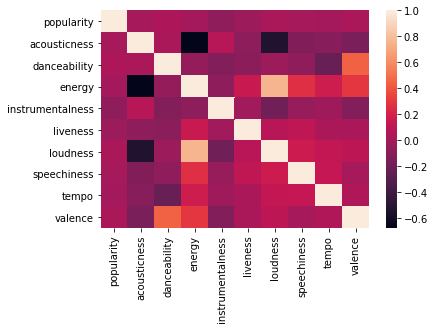

In [18]:
rockCorr = rockdf.corr()
sns.heatmap(rockCorr)

The heat map above shows the strength of both positive and negative correlations between the variables. For example, there are strong positive correlations between loudness and energy along with valence and danceability which seems logical. It makes sense that loudness would increase with energy along with danceability increasing with valence. Valence is a variable that basically measures happiness of a song with a valence value around one being very happy and a valence value around zero being very sad. Danceable songs are mostly happy. Energy and loudness also have strong negative correlations with acousticness which again, makes sense. Acoustic songs tend to be soft and slow paced which creates a low energy and quiteness to the music. What is not clear in this heat map, is any of the factors effect on popularity which may cause us to need to look further into the data. 

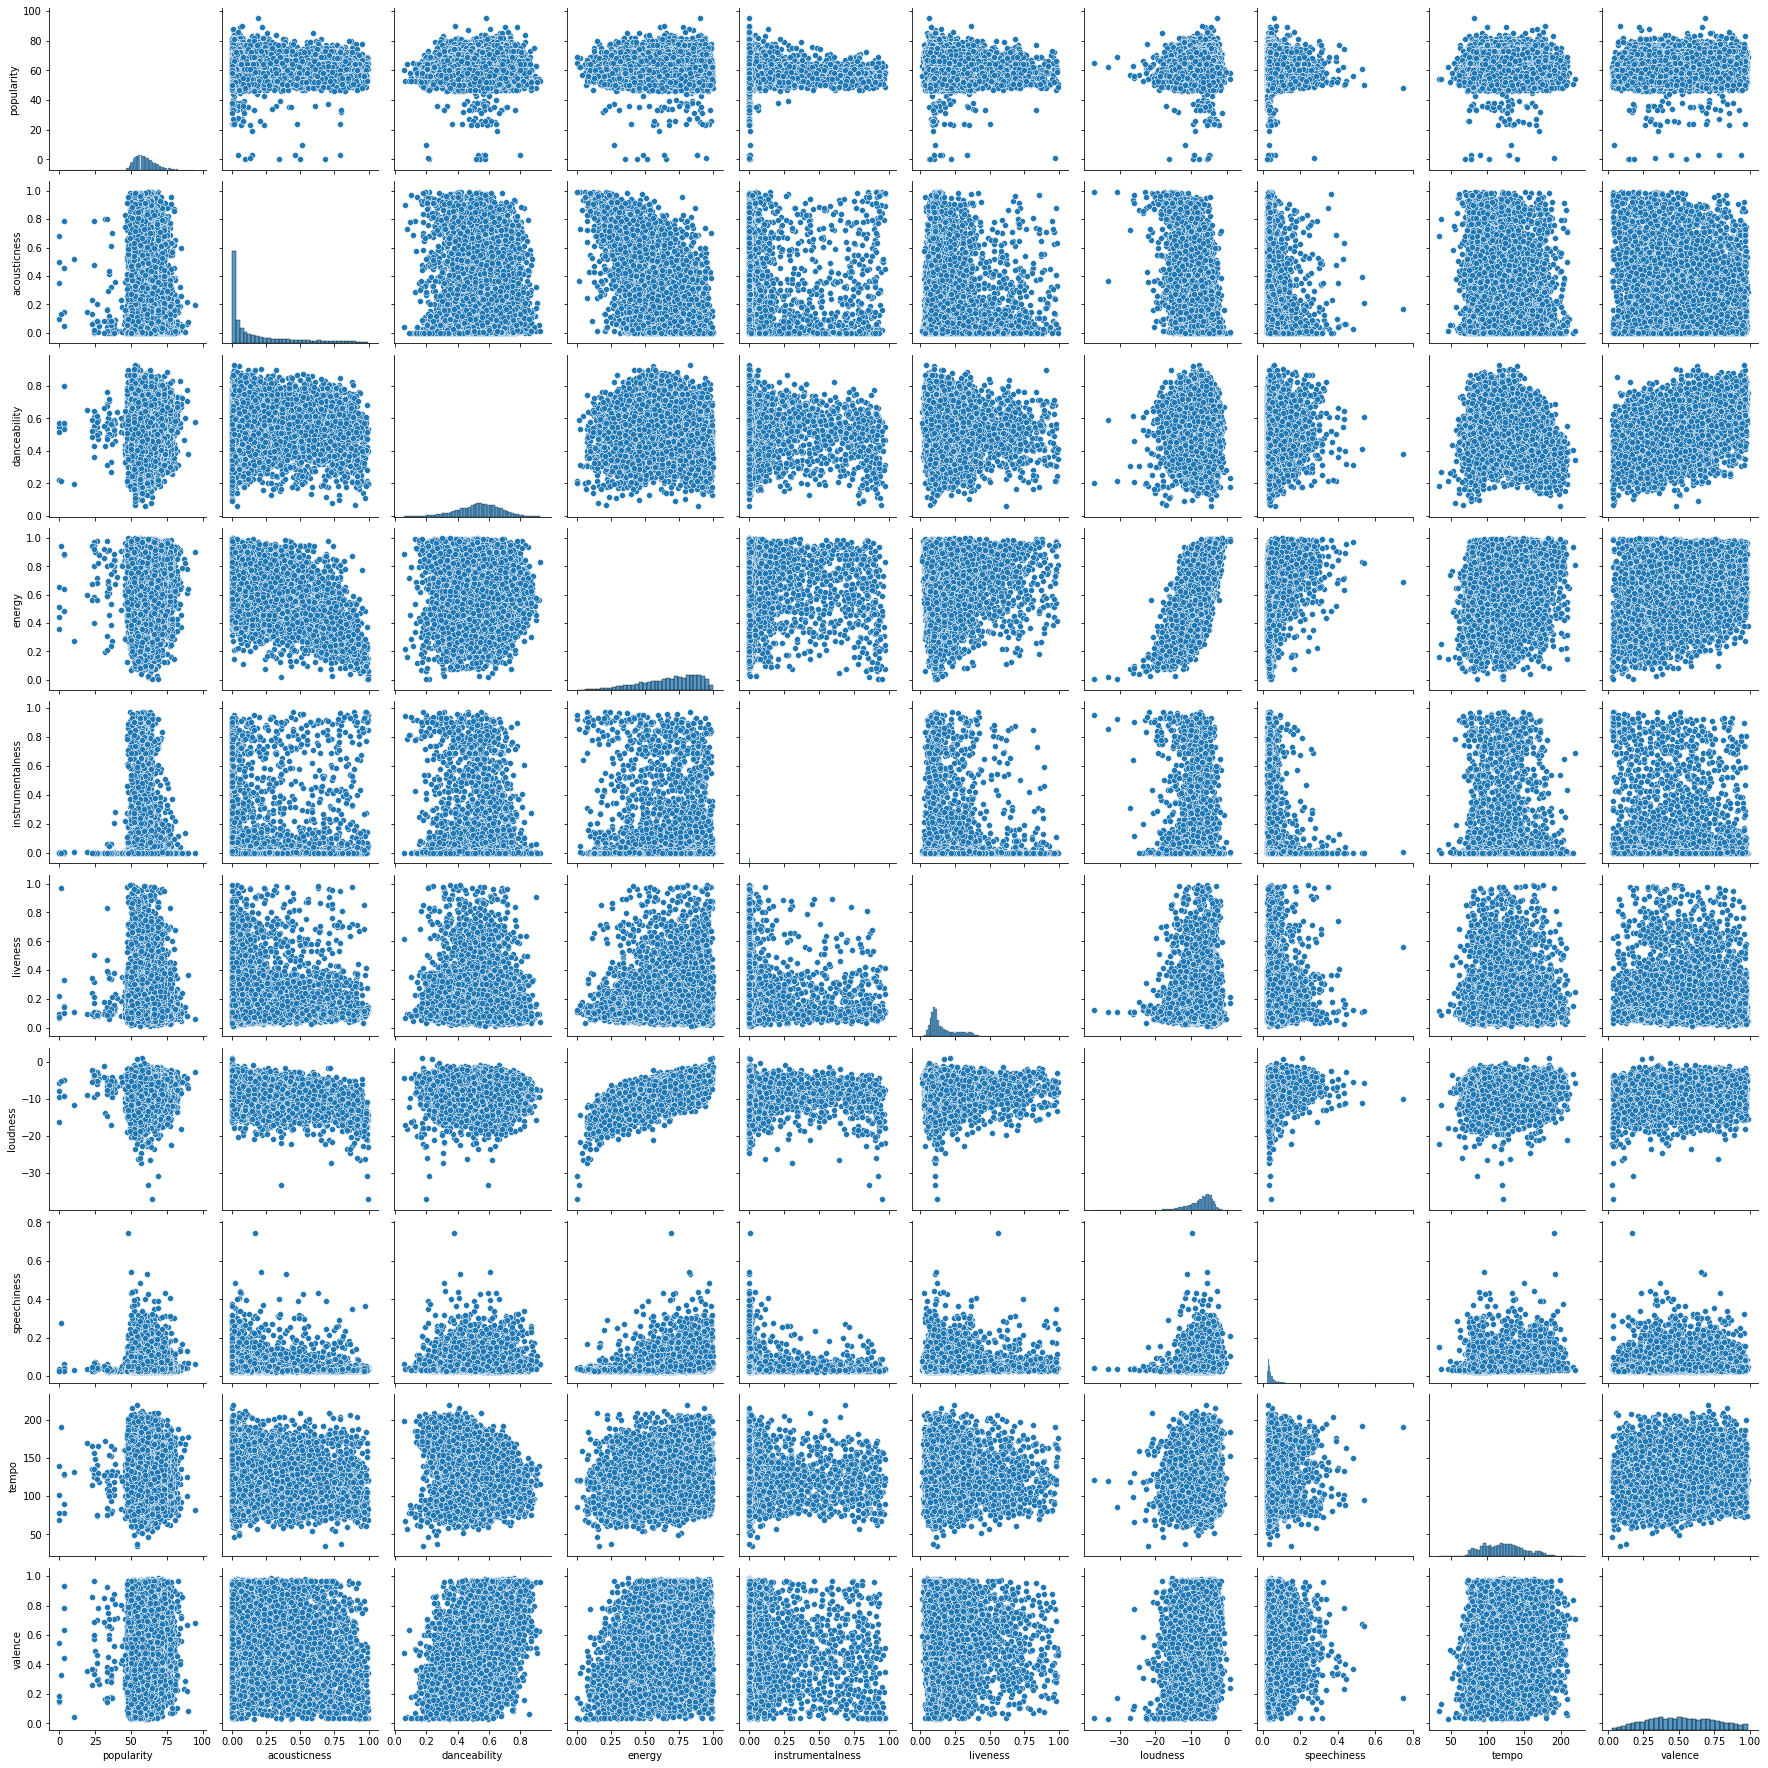

In [19]:
sns.pairplot(rockdf)


#a pairplot to see the correlations between the variable in the dataframe pictured in the above heatmap

By looking at this pairplot, it helps convey the same message as the heatmap, but also provides the actual datapoints to get a little more understanding for what is going on. The correlations are now visualized, but it is still unclear whether there is any pattern between the other music qualities and popularity.

# PCA

In [20]:
from sklearn.decomposition import PCA
from sklearn import preprocessing 

In [21]:
scaled_data = preprocessing.scale(rockdf.T)

After centering the data, the average value for each observation will be 0 and the standard deviations for the values will be one.

In [22]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

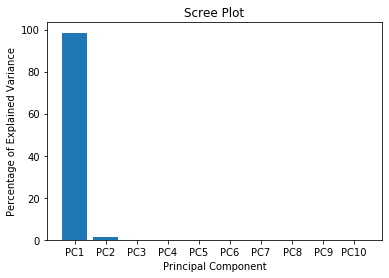

In [23]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]

plt.bar(x = range(1,len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title("Scree Plot")
plt.show()

Nearly all the data appears to be represented by PC1 which means that a graph with PC1 and PC2 should do a good job at depicting the data

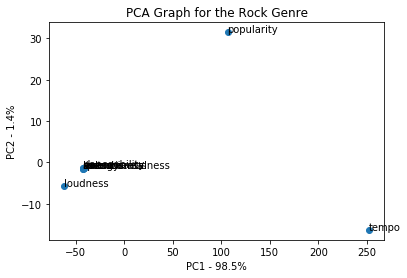

In [24]:
pca_df = pd.DataFrame(pca_data,index = ['popularity', 'acousticness',
 'danceability', 'energy', 'instrumentalness',  'liveness',
 'loudness', 'speechiness', 'tempo', 'valence'], columns = labels)

plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title('PCA Graph for the Rock Genre')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))

plt.show()

As we can see on this graph, the main importance is looking at the spread of the factors along the x axis since PC1 explains 98.5 percent of the data. When looking at this, it is clear that a majority of the variable are correlated heavy in the rock genre, but none of them appear to have a correlation with popularity according to their distance with it along the x axis.

### Possible Rationale
A major reason why a clear relation between popularity and the rest of the predictors may not be showing up could be due to the Simpson's paradox. The Simpson's paradox is basically a phenomena where trends in data completely disappear when grouped together. A problem could be that a genre could be much too broad of a grouping to see trends. This is because there are so many different sub-genres within the rock genre that could be clouding the data. For example, there is folk rock, metal, punk rock, and so much more that all have different sounds and appeal to a different audience. One possible solution which is to look at songs from a single artist and use those trends to get a feel for important factors within the music. This will severely limit the power of the data because the sample size will likely be small, but it seems to make the most sense in order to find a trend.

# Assesment of Popularity by Artist (to remedy Simpson's paradox)

### Rock Genre Band 1: Led Zeppelin

Led Zeppelin is a typical and popular rock band that could represent a majority of the rock genre, which is why they should be looked at first.

In [25]:
zeppData = dataDf.copy()[dataDf.artist_name=='Led Zeppelin']
zeppdf = pd.DataFrame(zeppData)

In [26]:
len(zeppdf)

76

In [27]:
zepp2df = zeppdf.drop(['artist_name','track_name','track_id','key','mode','time_signature',\
                            'genre','duration_ms'], axis=1)

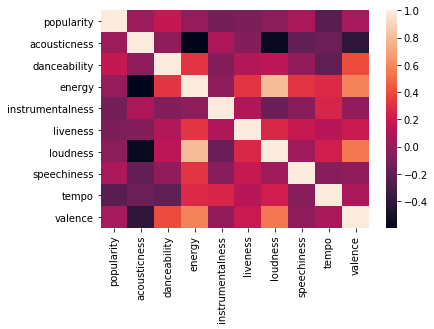

In [28]:
zepp2Corr = zepp2df.corr()
sns.heatmap(zepp2Corr)

When we look at songs from Led Zepellin only, we actually begin to see which attributes effect popularity. It is now apparent that danceablility has a positive effect on the popularity which was present in our original components analysis for all songs. It is also apparent that valence and speechiness have slightly positive effects on the popularity, but not nearly the same effect as danceability. In contrast, attributes that have negative effects on the popularity appear to be tempo, instrumentalness, and acousticness. Acousticness was also mentioned as one of the main two components that contributes to popularity for all songs. These initial depictions from the heatmap are extremely promising to our overall goal of demonstrating the key effects of popularity.

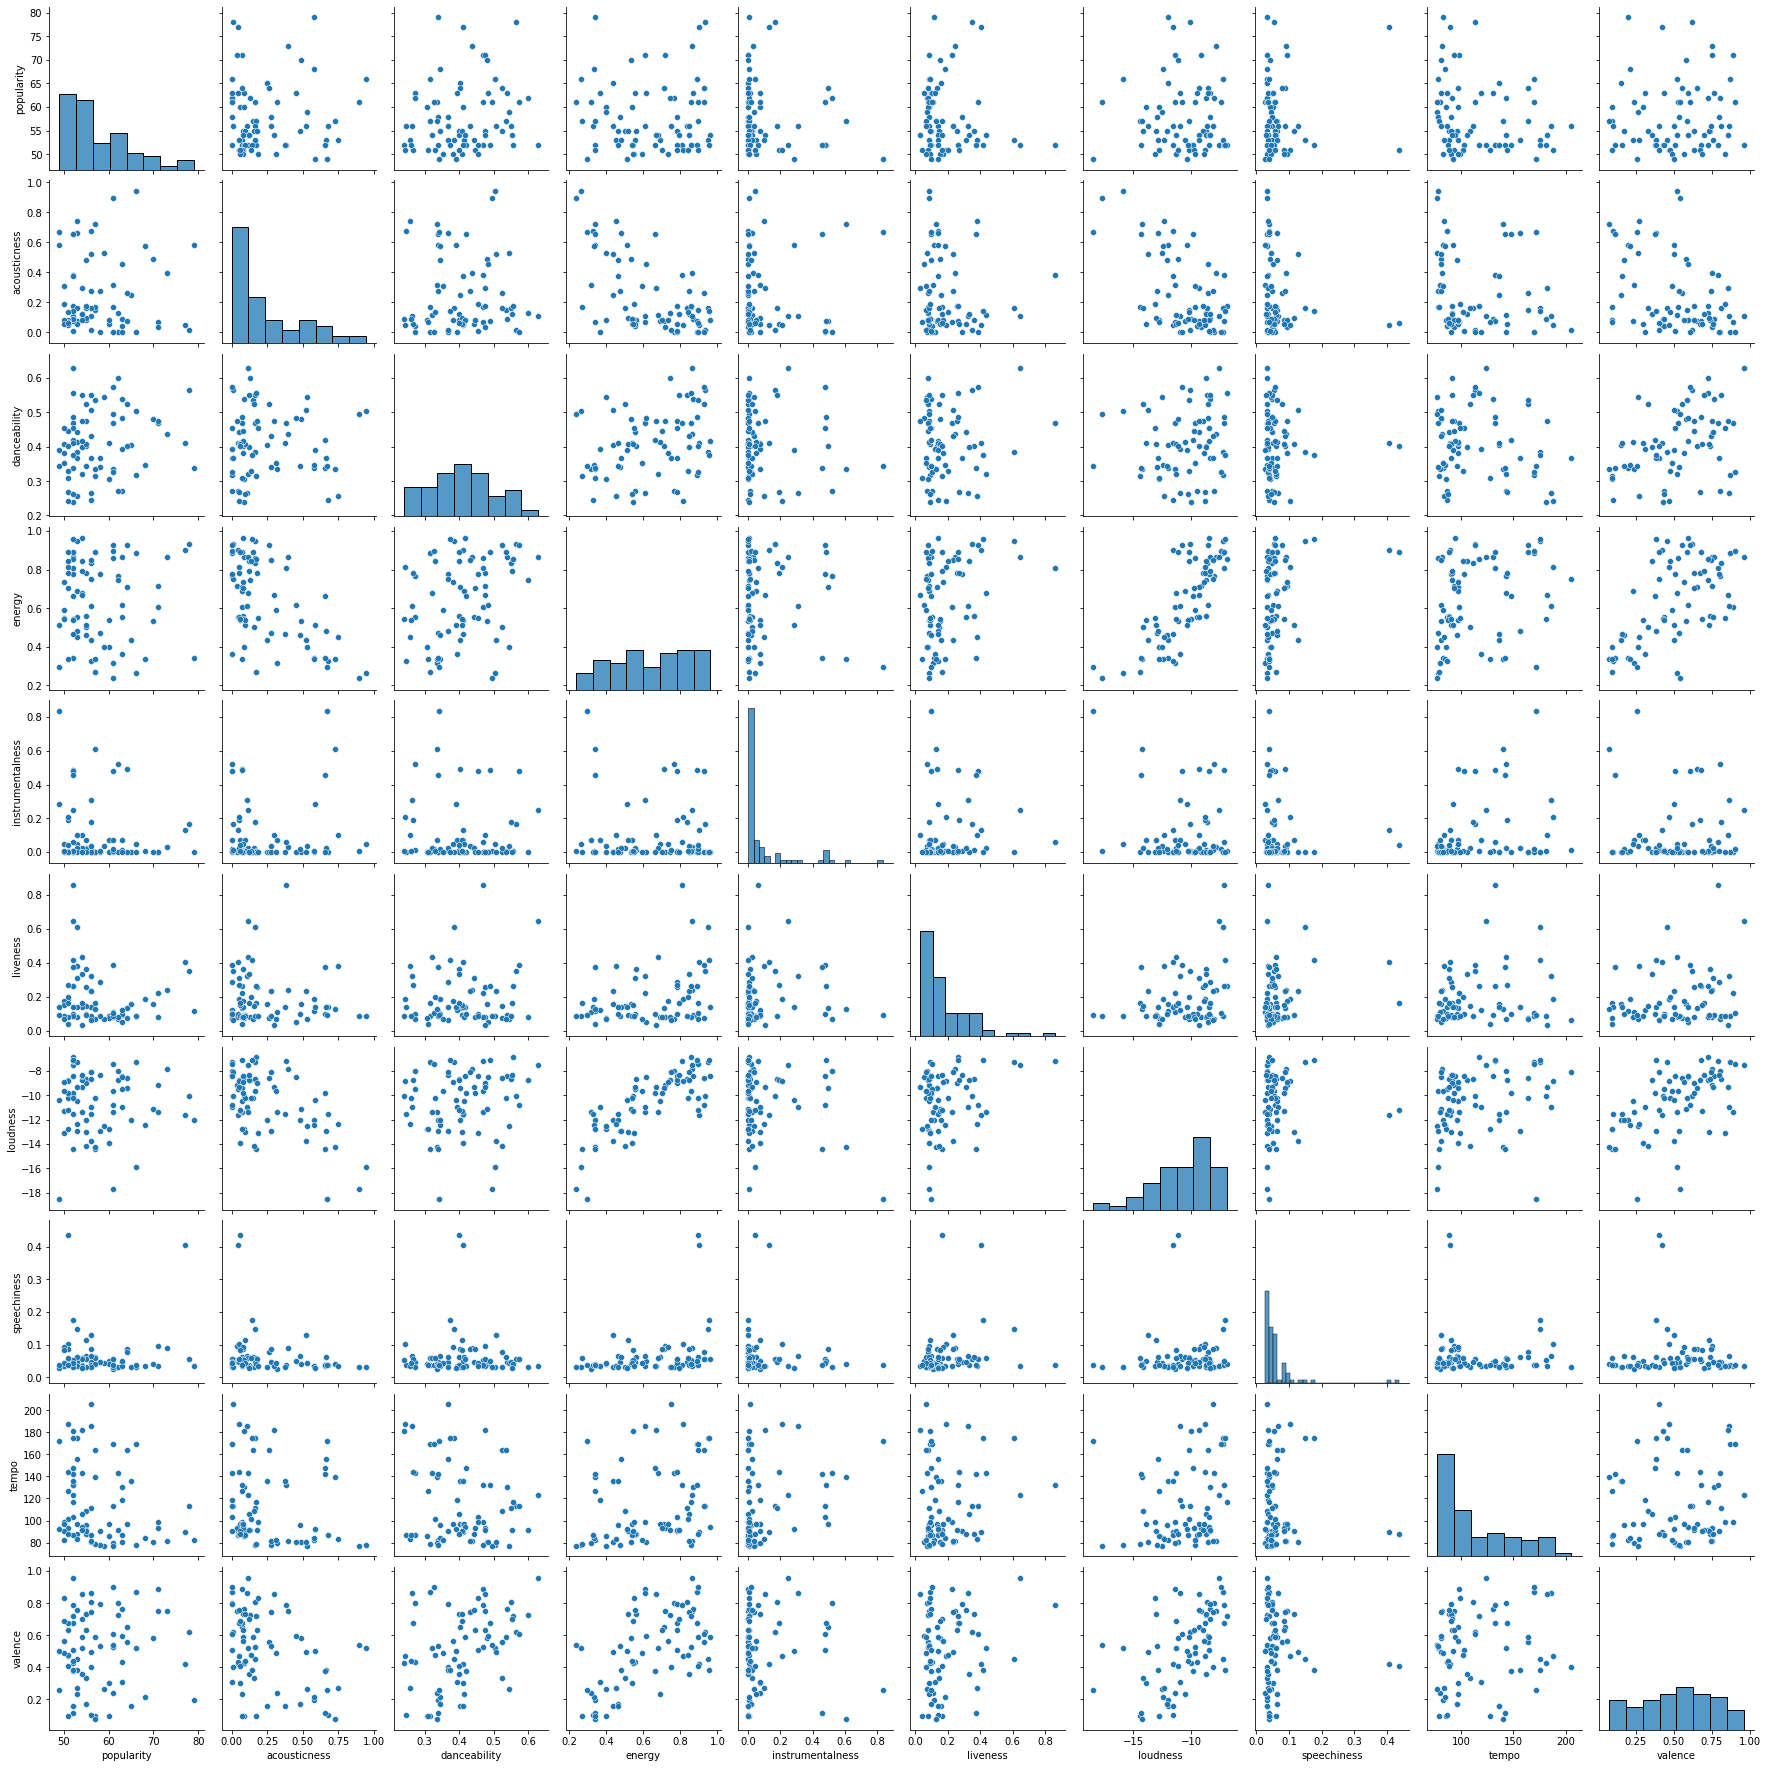

In [29]:
sns.pairplot(zepp2df)

### PCA for Led Zeppelin

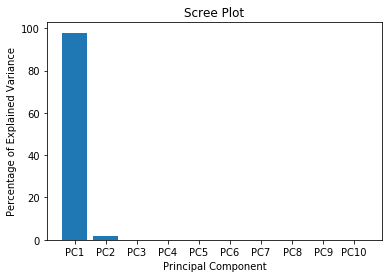

In [30]:
scaled2_data = preprocessing.scale(zepp2df.T)

pca2 = PCA()
pca2.fit(scaled2_data)
pca2_data = pca2.transform(scaled2_data)

per2_var = np.round(pca2.explained_variance_ratio_*100, decimals = 1)
labels = ['PC' + str(x) for x in range(1,len(per2_var)+1)]

plt.bar(x = range(1,len(per2_var)+1), height = per2_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title("Scree Plot")
plt.show()

Again, the first principle component seems to hold a majority of the data so the same method of plotting will work.

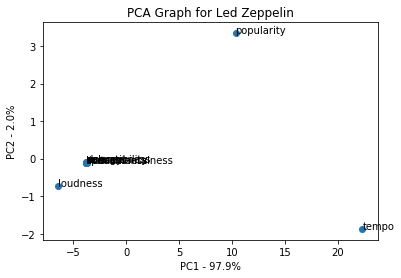

In [31]:
pca2_df = pd.DataFrame(pca2_data,index = ['popularity', 'acousticness',
 'danceability', 'energy', 'instrumentalness',  'liveness',
 'loudness', 'speechiness', 'tempo', 'valence'], columns = labels)

plt.scatter(pca2_df.PC1,pca2_df.PC2)
plt.title('PCA Graph for Led Zeppelin')
plt.xlabel('PC1 - {0}%'.format(per2_var[0]))
plt.ylabel('PC2 - {0}%'.format(per2_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca2_df.PC1.loc[sample],pca2_df.PC2.loc[sample]))

plt.show()

Initially, this graph looks nearly identical to the one prior, but with more care examination, it is apparent that the distance from popularity to the other predictors is much smaller in this graph. This is apparent because both the PC1 axis and the PC2 axis have greatly been reduced, while still witholding the predictors demonstrating a greater relation and correlation between popularity and the other attributes.

### Rock Genre Band 2: Metallica

Metallica is an atypical rock band with harder and heavier roots in the metal sub-genre. It is important to look at them to see if they and other bands similar to them have been clouding the data and the importance of each predictor since they are so different from the bands within their category.

In [32]:
metallicaData = dataDf.copy()[dataDf.artist_name=='Metallica']
metallicadf = pd.DataFrame(metallicaData)
len(metallicadf)

46

In [33]:
metallicadf = metallicadf.drop(['artist_name','track_name','track_id','key','mode','time_signature',\
                            'genre','duration_ms'], axis=1)

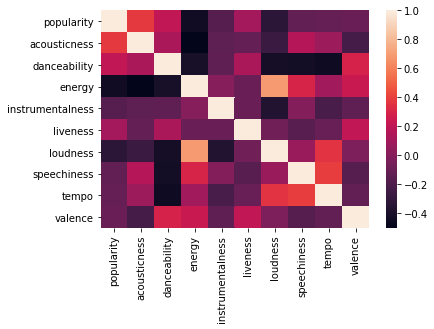

In [34]:
metallicaCorr = metallicadf.corr()
sns.heatmap(metallicaCorr)

This heatmap demonstrates exactly what is expected from a band that is so different from typical rock within the rock genre. Their heatmap does not follow suit with the Led Zeppelin heatmap, or the overall rock genre heatmap demonstrating the importance of the the sub-genre category. Without the sub-genre category in our dataset, the Simpson's paradox is beginning to appear to be present within the genre groupings by looking at the individual artists. Examples from this heat map include the fact that acousticness makes a song much more popular, which is the exact opposite of what we have determined to be acousticness's effect prior. Danceability does somewhat follow suit with the Led Zeppelin trend and the overall trend within all songs, but there is reason behind this. Since Metallica is such a heavy metal band, it does not appeal to the masses, but when they calm their music down with more acousticness and danceability, it becomes more mainstream and therefore more popular. 

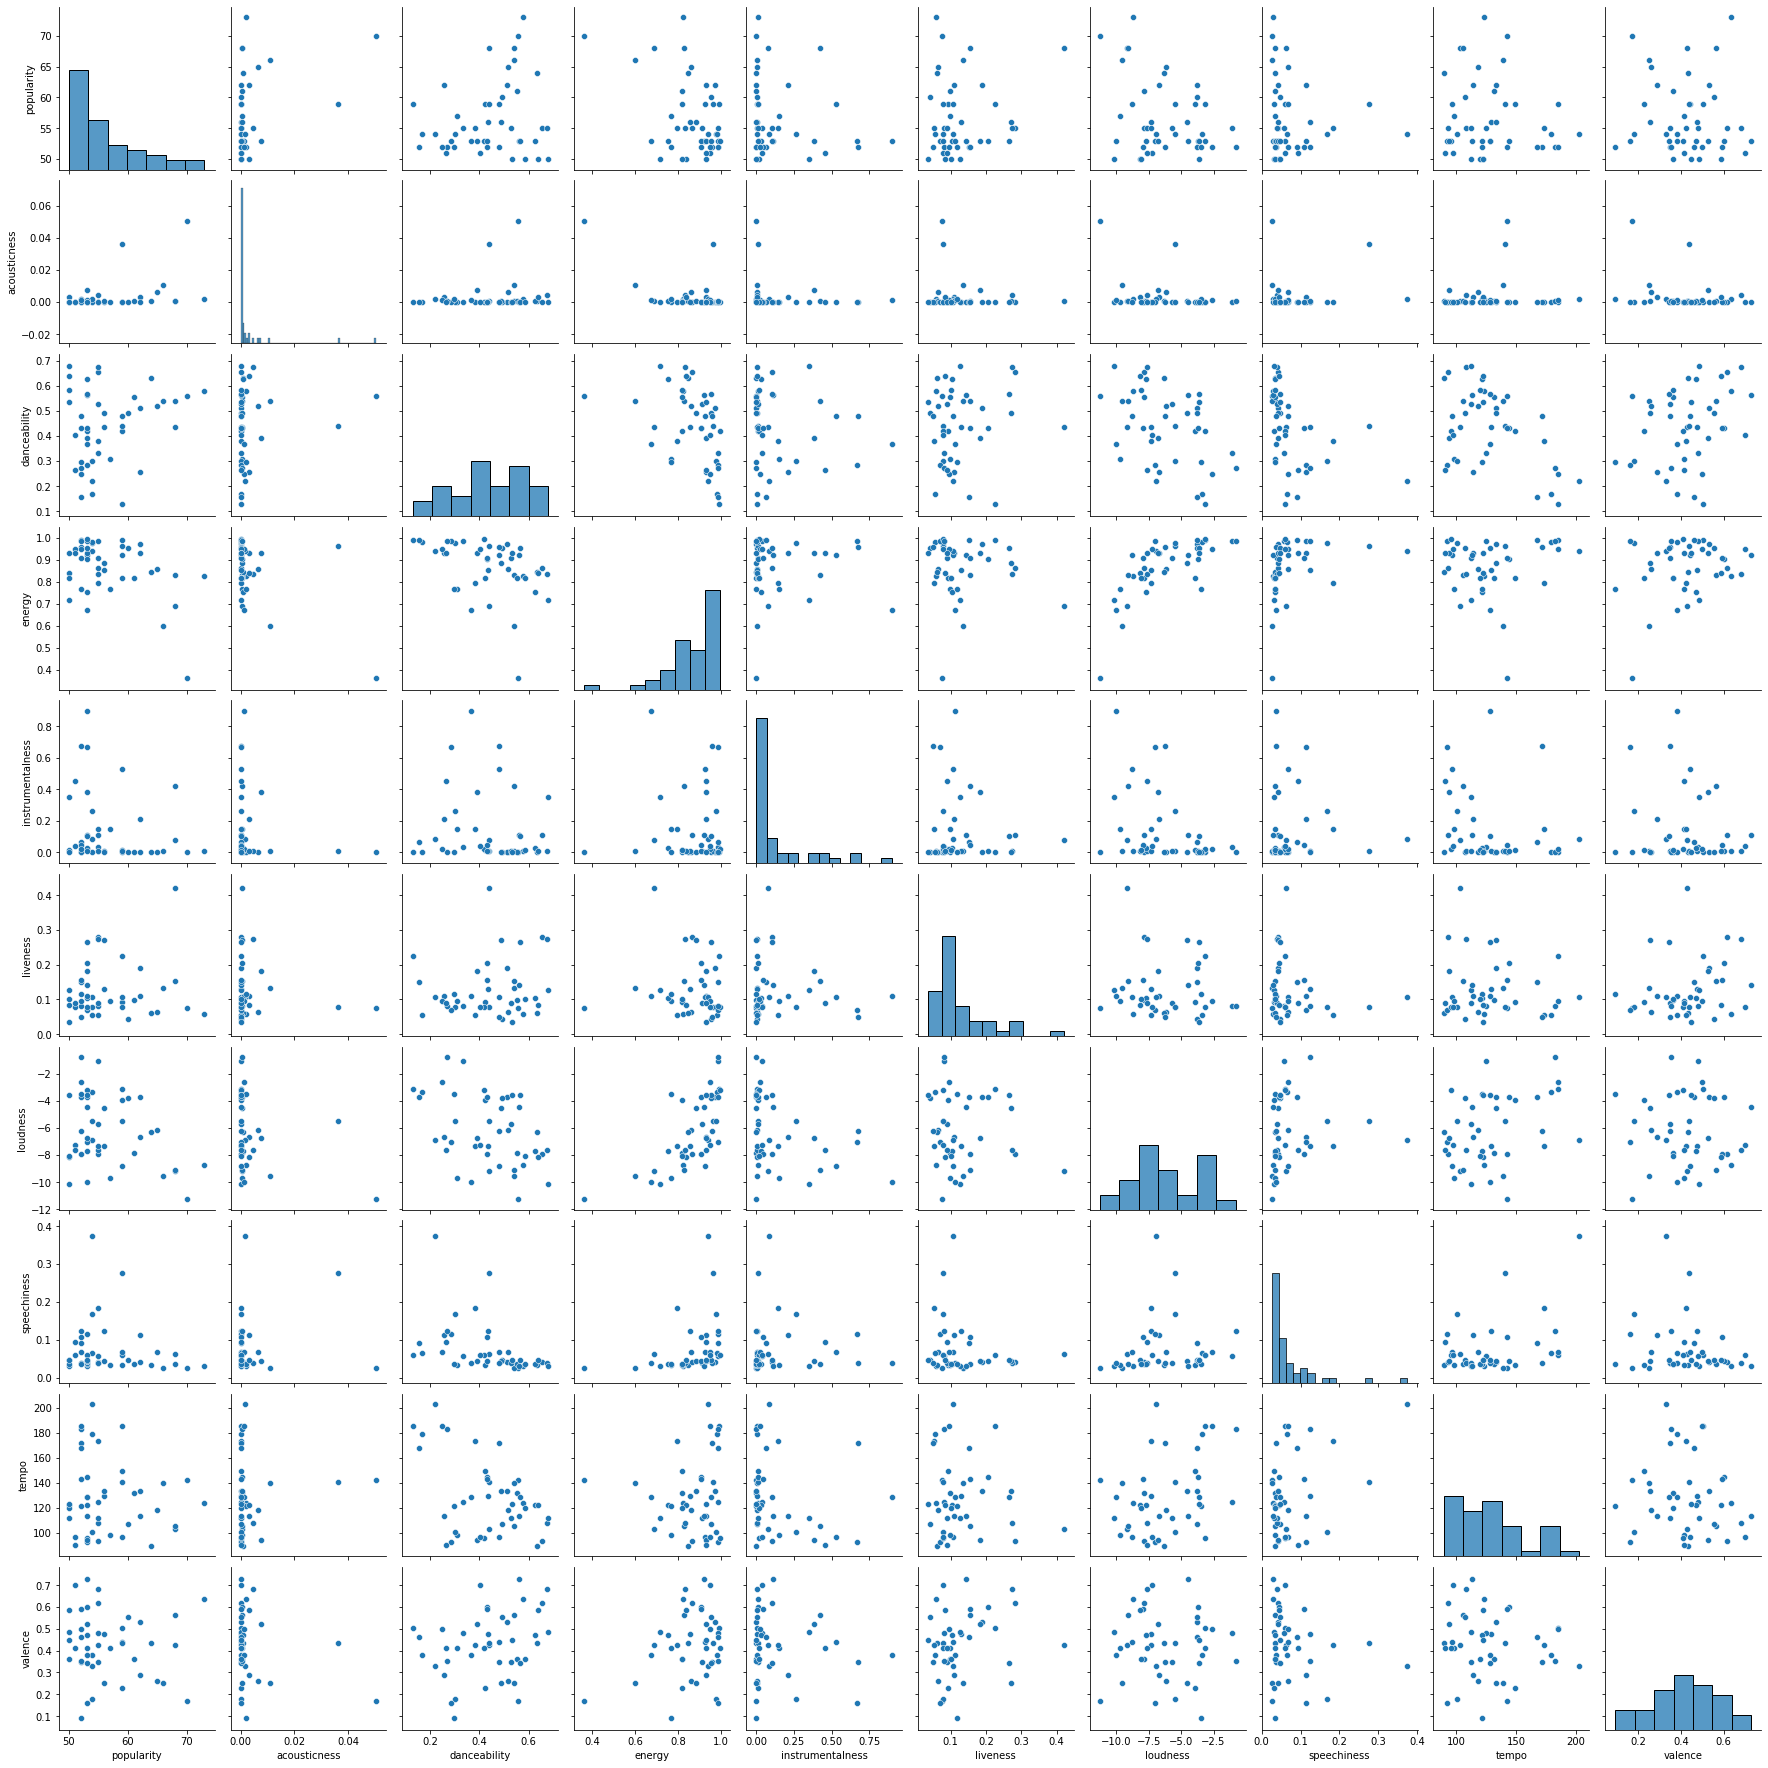

In [35]:
sns.pairplot(metallicadf)

### PCA for Metallica

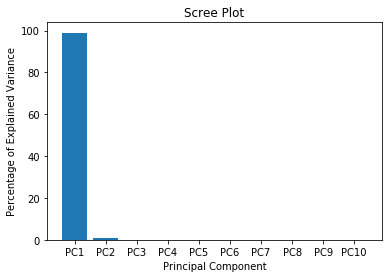

In [36]:
scaled3_data = preprocessing.scale(metallicadf.T)

pca3 = PCA()
pca3.fit(scaled3_data)
pca3_data = pca3.transform(scaled3_data)

per3_var = np.round(pca3.explained_variance_ratio_*100, decimals = 1)
labels = ['PC' + str(x) for x in range(1,len(per3_var)+1)]

plt.bar(x = range(1,len(per3_var)+1), height = per3_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title("Scree Plot")
plt.show()

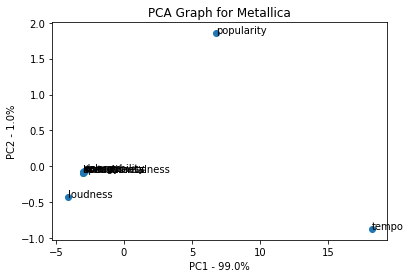

In [37]:
pca3_df = pd.DataFrame(pca3_data,index = ['popularity', 'acousticness',
 'danceability', 'energy', 'instrumentalness',  'liveness',
 'loudness', 'speechiness', 'tempo', 'valence'], columns = labels)

plt.scatter(pca3_df.PC1,pca3_df.PC2)
plt.title('PCA Graph for Metallica')
plt.xlabel('PC1 - {0}%'.format(per3_var[0]))
plt.ylabel('PC2 - {0}%'.format(per3_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca3_df.PC1.loc[sample],pca3_df.PC2.loc[sample]))

plt.show()

The groupings of predictors within this graph are identical to the PCA graphs prior, but again, this graph has much closer distance between popularity and the rest of predictors in comparison to the overall rock genre. 